In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\kdiza\Downloads\archive (6)\song_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


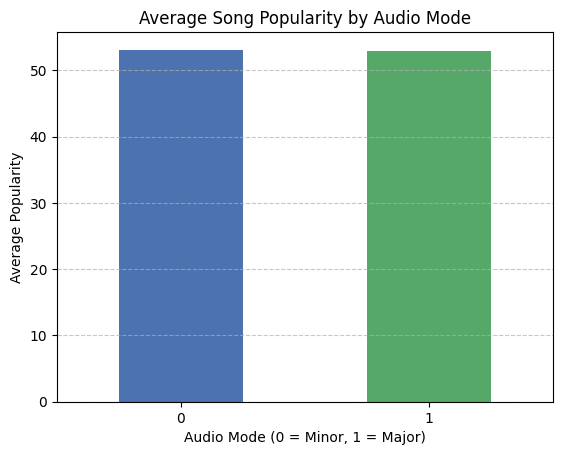

In [ ]:
mode_popularity = df.groupby("audio_mode")["song_popularity"].mean()

mode_popularity.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Song Popularity by Audio Mode")
plt.xlabel("Audio Mode (0 = Minor, 1 = Major)")
plt.ylabel("Average Popularity")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

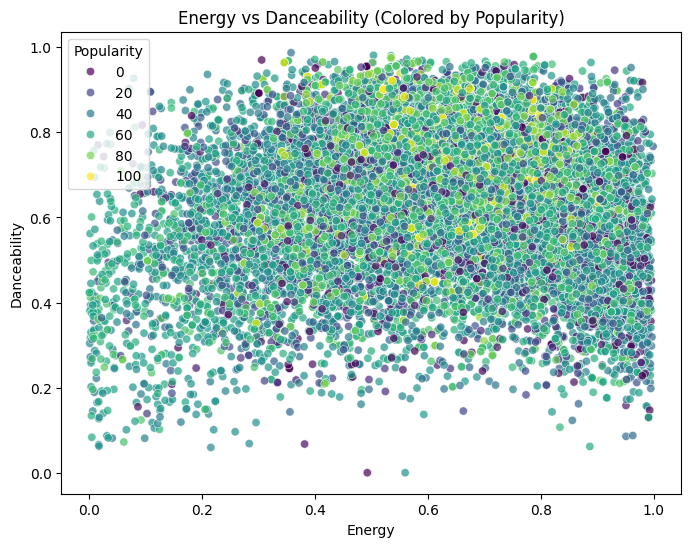

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="energy",
    y="danceability",
    hue="song_popularity",
    palette="viridis",
    alpha=0.7
)
plt.title("Energy vs Danceability (Colored by Popularity)")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend(title="Popularity", loc="best")
plt.show()

# Preproccessing


In [8]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = df.drop(columns=["song_name"])

df["duration_sec"] = df["song_duration_ms"] / 1000
df = df.drop(columns=["song_duration_ms"])

df["key_sin"] = np.sin(2 * np.pi * df["key"] / 12)
df["key_cos"] = np.cos(2 * np.pi * df["key"] / 12)
df = df.drop(columns=["key"])

popularity = df["song_popularity"]
df = df.drop(columns=["song_popularity"])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

print("✅ Preprocessing complete! Shape:", scaled_df.shape)
scaled_df.head()

✅ Preprocessing complete! Shape: (18835, 14)


,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,duration_sec,key_sin,key_cos
0,-0.876374,-0.876400,0.172845,-0.351913,-0.838658,0.875829,0.769418,-0.696514,1.601565,0.136944,-0.220610,0.736757,-1.238426,-0.754506
1,-0.859818,-0.582880,0.971555,-0.352046,-0.497639,0.271815,-1.299684,-0.501066,-0.550858,0.136944,-0.645751,-0.021350,1.571165,-0.082289
2,-0.867195,0.661389,-0.850065,1.665241,0.523333,-0.099423,0.769418,-0.219391,0.097788,0.136944,-0.833793,0.225786,0.065510,1.262146
3,-0.804053,-1.163539,1.518042,-0.336025,-0.539312,0.655594,0.769418,0.046954,0.047742,0.136944,-1.348867,-0.021350,0.065510,1.262146
4,-0.892189,-1.189062,0.565194,-0.352046,-0.462913,0.622415,0.769418,-0.678310,1.773991,0.136944,0.188178,0.093752,-1.238426,0.589929


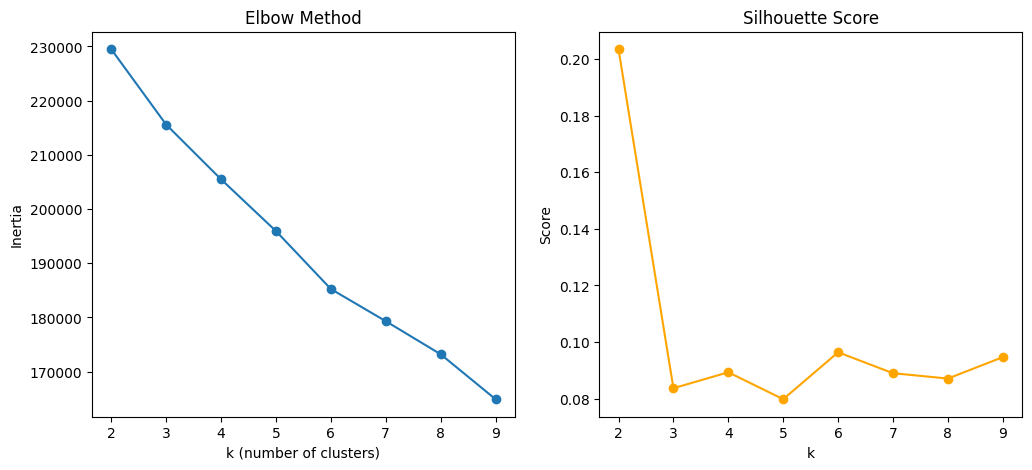

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_df, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.show()


In [ ]:
best_k = 4 
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_df)
df["cluster"] = kmeans.labels_


In [12]:
cluster_summary = df.copy()
cluster_summary["popularity"] = popularity
cluster_summary.groupby("cluster").mean()[["energy", "danceability", "audio_valence", "acousticness", "popularity"]]


,energy,danceability,audio_valence,acousticness,popularity
cluster,,,,,
0,0.682459,0.743455,0.648500,0.188602,55.357484
1,0.776261,0.542931,0.458547,0.100853,52.177589
2,0.352483,0.564288,0.395658,0.664577,49.511628
3,0.419028,0.486613,0.366932,0.564590,49.125471


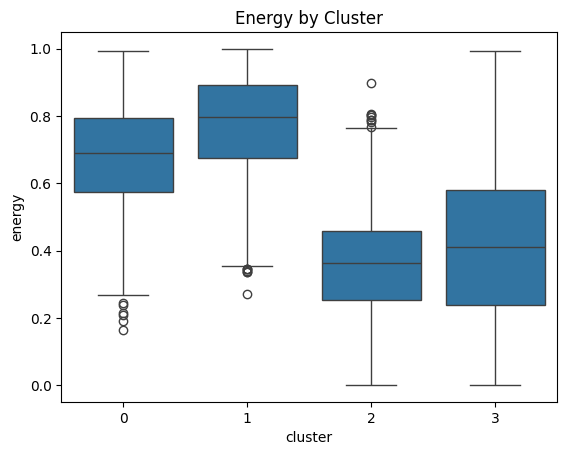

In [13]:
import seaborn as sns
sns.boxplot(data=cluster_summary, x="cluster", y="energy")
plt.title("Energy by Cluster")
plt.show()


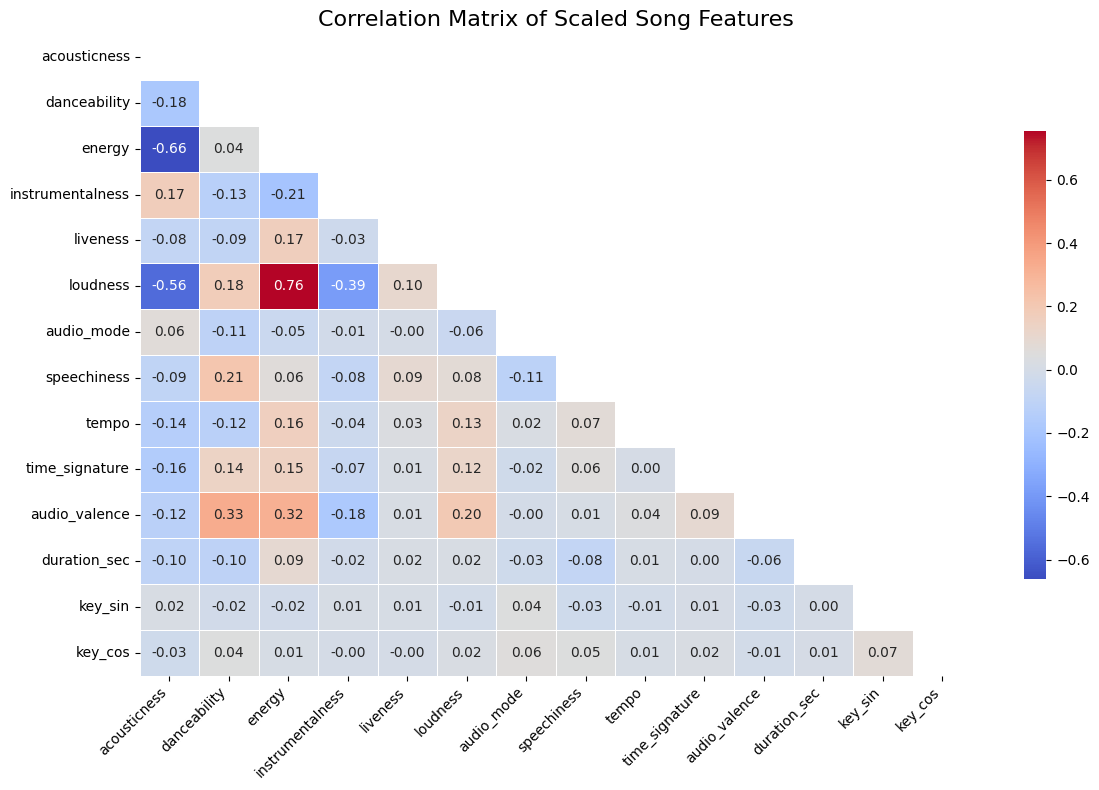

In [ ]:
corr = scaled_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title("Correlation Matrix of Scaled Song Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

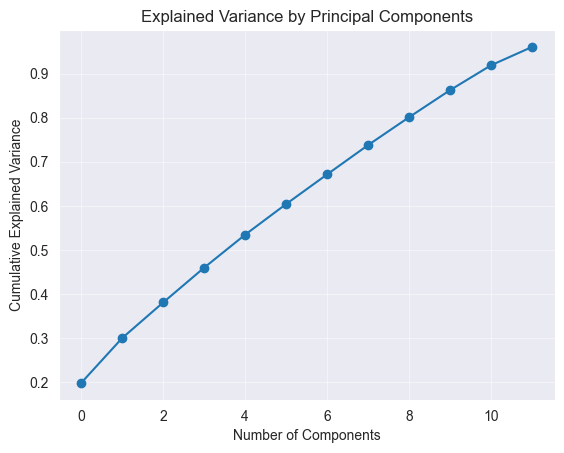

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
pca.fit(scaled_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True, alpha=0.5)
plt.show()


In [17]:
pca = PCA(n_components=3, random_state=42)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1', 'PC2', 'PC3'])

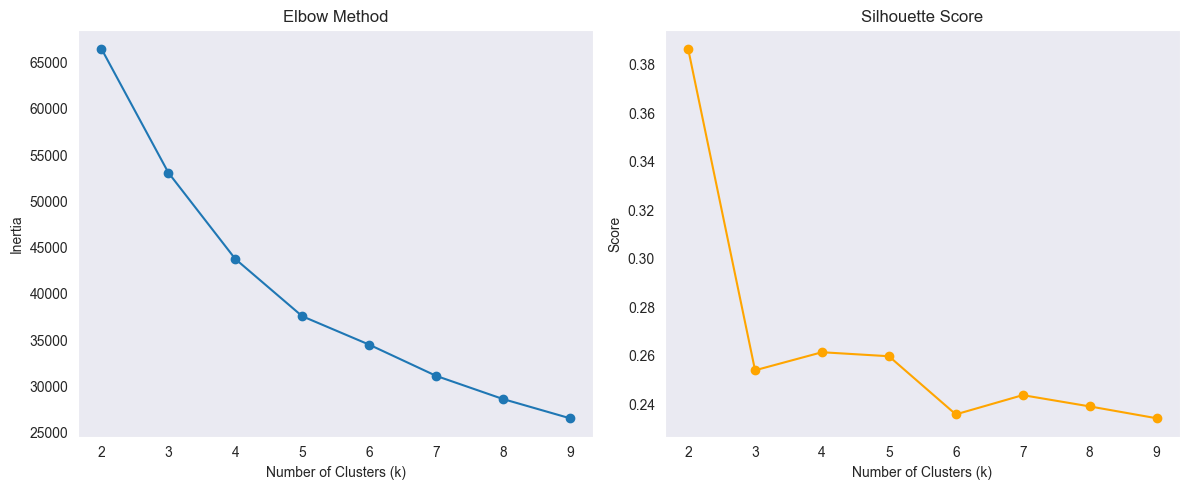

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(K, inertias, marker='o')
axs[0].set_title("Elbow Method")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Inertia")

axs[1].plot(K, silhouette_scores, marker='o', color='orange')
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Score")

plt.tight_layout()
plt.show()


In [ ]:
best_k = 4 

kmeans = KMeans(n_clusters=best_k, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_df)

print(pca_df["Cluster"].value_counts())


Cluster
3    6407
0    4765
1    4520
2    3143
Name: count, dtype: int64


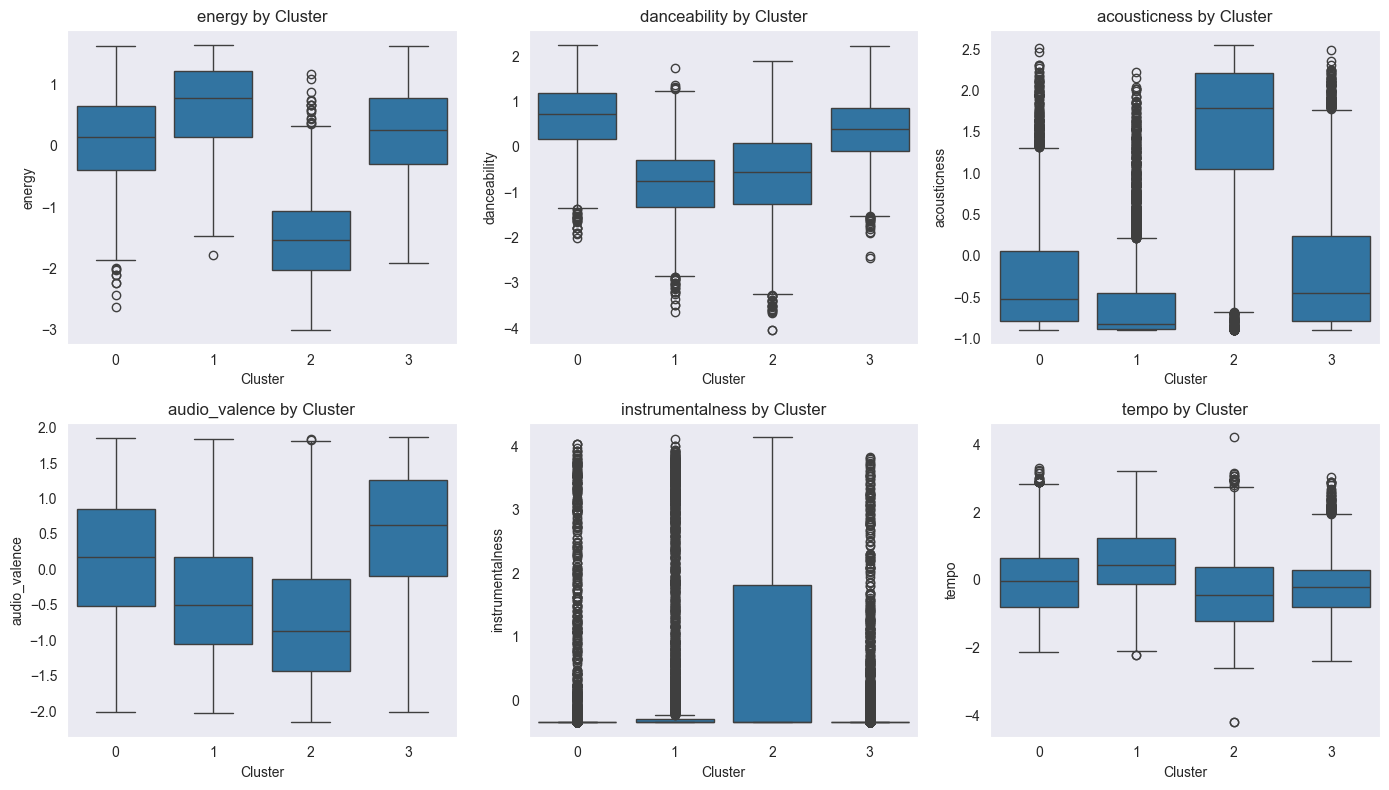

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = ['energy', 'danceability', 'acousticness', 'audio_valence', 'instrumentalness', 'tempo']

fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.flatten()

for i, column in enumerate(subset):
    sns.boxplot(x=pca_df["Cluster"], y=scaled_df[column], ax=axs[i])
    axs[i].set_title(f'{column} by Cluster')
    axs[i].set_xlabel('Cluster')
    axs[i].set_ylabel(column)

plt.tight_layout()
plt.show()


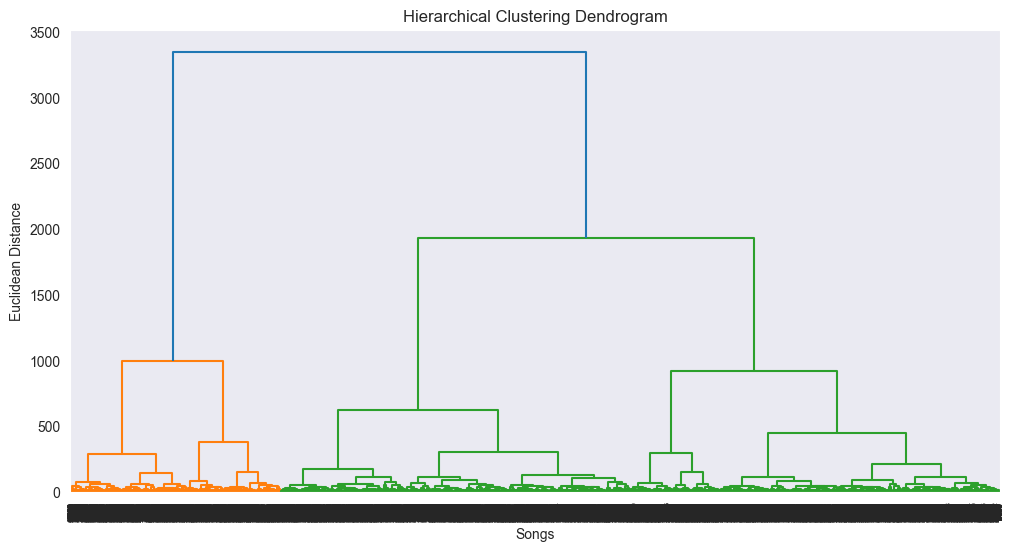

Cluster counts:
AggCluster
0    7485
2    7074
3    2359
1    1917
Name: count, dtype: int64

K-Means vs Agglomerative Cluster Cross-Tab:
AggCluster     0    1     2    3
Cluster                         
0           3709  752  2969  934
1           2546  759  2360  698
2            989  327  1428  567
3            241   79   317  160


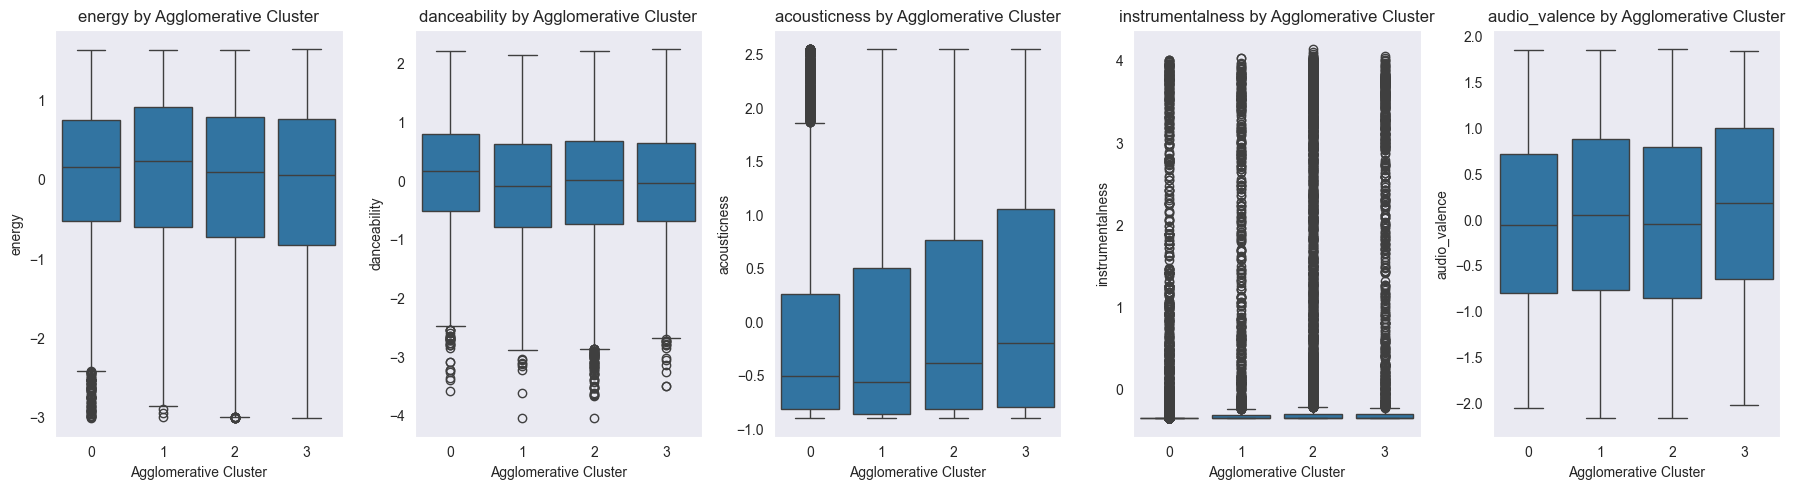

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Songs")
plt.ylabel("Euclidean Distance")

dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.show()

agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
scaled_df["AggCluster"] = agg.fit_predict(scaled_df)

print("Cluster counts:")
print(scaled_df["AggCluster"].value_counts())

comparison = pd.crosstab(scaled_df["Cluster"], scaled_df["AggCluster"])
print("\nK-Means vs Agglomerative Cluster Cross-Tab:")
print(comparison)

subset = ["energy", "danceability", "acousticness", "instrumentalness", "audio_valence"]

fig, axs = plt.subplots(1, len(subset), figsize=(18, 5))
axs = axs.flatten()

for i, col in enumerate(subset):
    sns.boxplot(data=scaled_df, x="AggCluster", y=col, ax=axs[i])
    axs[i].set_title(f"{col} by Agglomerative Cluster")
    axs[i].set_xlabel("Agglomerative Cluster")
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()
